# 管理图表样式

# 目录
+ 使用axes_style()和set_style()设置主题
+ 使用despine()移除轴线
+ 临时设置图表主题
+ 设置主题其他参数
+ 使用plotting_context()和set_context()来设置布局
+ 临时设置布局

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
np.random.seed(sum(map(ord, "aesthetics")))
%matplotlib inline

# matplotlib与seaborn的对比

In [2]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

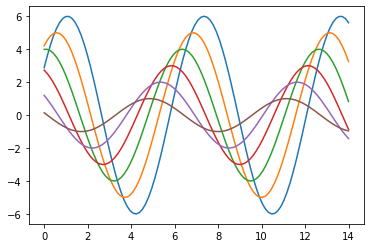

In [3]:
sinplot() # plot with matplotlib defaults

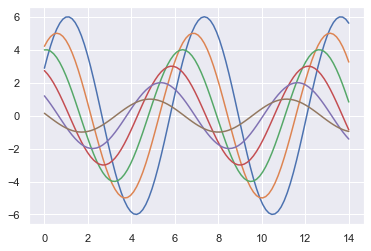

In [4]:
import seaborn as sns
sns.set()
sinplot() # plot with seaborn defaults

# 管理图表样式

Seaborn中有两种类型的函数（第一个函数返回参数当前设置，第二个函数设置参数）  
+ axes_style、set_style  
管理图表样式
+ plotting_context、set_context  
设置布局元素

## 使用axes_style()和set_style()设置主题

### 主题
Seaborn有五个预设好的主题：darkgrid, whitegrid, dark, white,和ticks

#### darkgrid
默认主题是darkgrid，白线灰底让网络不会影响代表数据的线的显示

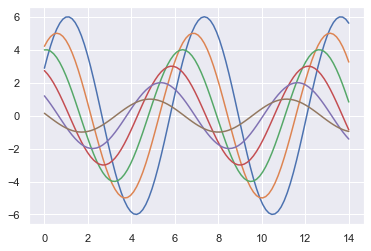

In [5]:
sinplot()

#### whitegrid
whitegrid主题非常简洁，更适用于数据元素较大的布局

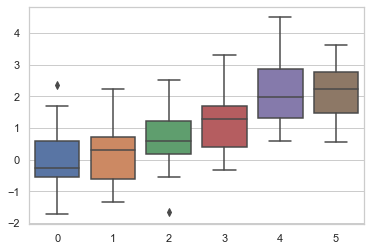

In [6]:
sns.set_style("whitegrid")
data = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sns.boxplot(data=data);

#### dark
对于大多数布局，(尤其是当你主要想要利用图表，来提供给人对于数据模式的印象)，网格便不那么重要了.

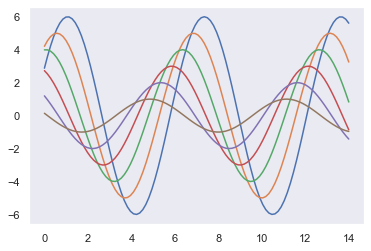

In [7]:
sns.set_style("dark")
sinplot()

#### white

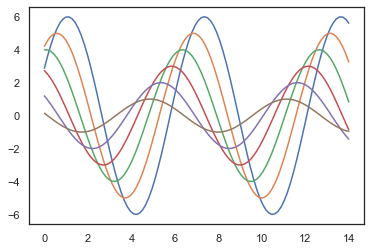

In [8]:
sns.set_style("white")
sinplot()

#### ticks
有时你可能想在布局上添加一些额外的结构,比如说将轴线分割成线段的ticks

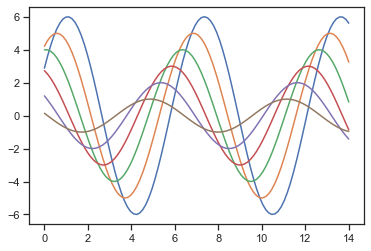

In [9]:
sns.set_style("ticks")
sinplot()

## 使用despine()移除轴线
主题white和ticks都可以通过去除上方和右方不必要的轴线，通过调用seaborn的函数despine()来去除轴线

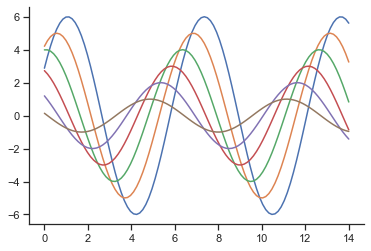

In [10]:
sns.set_style("ticks")
sinplot()
sns.despine()

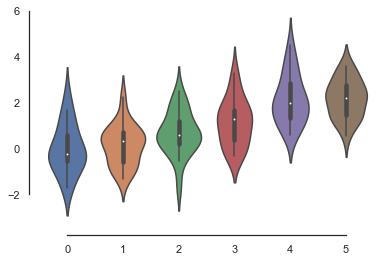

In [11]:
# 有些布局也可以通过调整轴线距数据的偏移来改善,这也能在despine()里完成，设置offset参数
# 当ticks不能覆盖轴线的整个范围时,trim参数可以限制显示的轴线的范围
sns.set_style("white")
sns.violinplot(data=data)
sns.despine(offset=10, trim=True) # offset调整轴线与图形的距离，trim=True限制轴线的范围（从0到5）

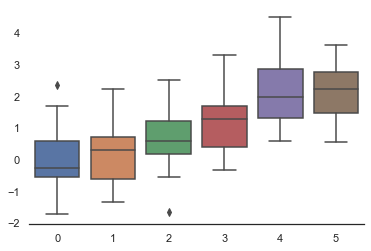

In [12]:
# 控制移除哪条轴线
sns.set_style("white")
sns.boxplot(data=data, palette="deep")
sns.despine(left=True) # 默认移除上侧、右侧轴线

## 临时设置图表主题
在with语句里使用axes_style()函数来临时设置控制布局的参数.这也允许你用不同的风格来制作图表

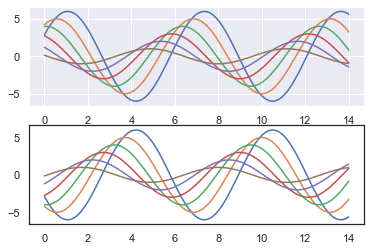

In [13]:
with sns.axes_style("darkgrid"):
    plt.subplot(211)
    sinplot()
plt.subplot(212)
# 参数-1使得画出的图形相对于x轴对称
sinplot(-1) 

## 设置主题其他参数

seaborn.set_style(style=None, rc=None)
+ style : dict, None, or one of {darkgrid, whitegrid, dark, white, ticks}  
A dictionary of parameters or the name of a preconfigured set.
+ rc : dict, optional  
Parameter mappings to override the values in the preset seaborn style dictionaries. This only updates parameters that are considered part of the style definition.

In [14]:
sns.axes_style() # 调用没有参数的函数,返回所有参赛的当前设置

{'axes.facecolor': 'white',
 'axes.edgecolor': '.15',
 'axes.grid': False,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'patch.force_edgecolor': True,
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

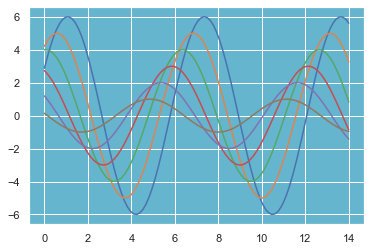

In [15]:
sns.set_style("darkgrid", {"axes.facecolor": "c"}) # 用dict将一系列控制参数赋值给axes_style()函数和set_style()函数的rc参数
sinplot()

## 使用plotting_context()和set_context()来设置布局

seaborn.set_context(context=None, font_scale=1, rc=None)
+ context : dict, None, or one of {paper, notebook, talk, poster}  
A dictionary of parameters or the name of a preconfigured set.
+ font_scale : float, optional  
Separate scaling factor to independently scale the size of the font elements.
+ rc : dict, optional  
Parameter mappings to override the values in the preset seaborn context dictionaries. This only updates parameters that are considered part of the context definition.

In [16]:
# 重置context默认设置
sns.set() 

有4种布局(context),按相对大小排序分别是：paper, notebook, talk,和poster  
布局设置影响标题（label）、线型（lines）和其他一些绘图元素，默认布局是notebook，四种布局分别将参数设置为0.8，1，1.3，1.6

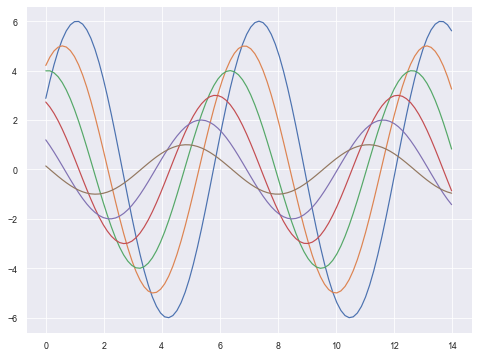

In [17]:
sns.set_context("paper")
plt.figure(figsize=(8, 6))
sinplot()

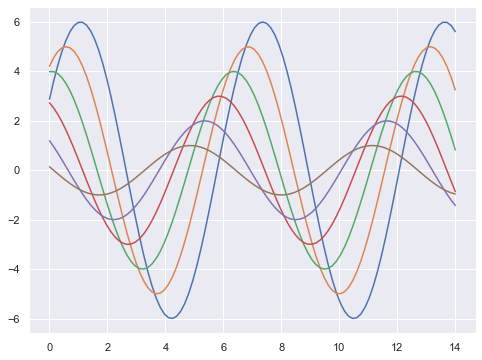

In [18]:
sns.set_context("notebook")
plt.figure(figsize=(8, 6))
sinplot()

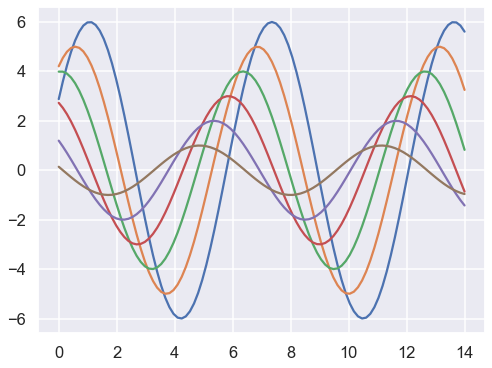

In [19]:
sns.set_context("talk")
plt.figure(figsize=(8, 6))
sinplot()

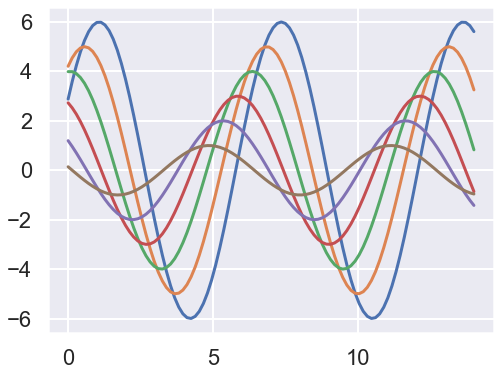

In [20]:
sns.set_context("poster")
plt.figure(figsize=(8, 6))
sinplot()

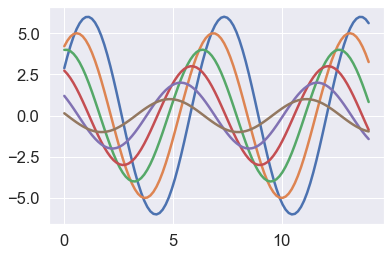

In [21]:
# 设置context、字体大小以及其他参数
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5}) 
sinplot()

## 临时设置布局
在with语句里使用plotting_context()函数来临时设置控制布局的参数.这也允许你用不同的风格来制作图表

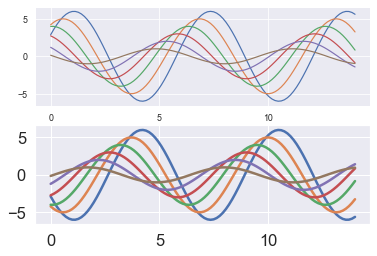

In [22]:
with sns.plotting_context("paper"):
    plt.subplot(211)
    sinplot()
plt.subplot(212)
# 参数-1使得画出的图形相对于x轴对称
sinplot(-1) 